# Stock as a Random Walk

### What is a random walk?
A time series in which the period-to-period changes are a random sample. In other words, you can't predict anything about the changes. It may trend to a direction, but at any given time you are blind to what the next time period will show.

It's like a drunk guy trying to stumble home from the bar. He's eventually going to get home, but at any given point, we have no idea whether he's going to stumble left, stumble right, and how far that side step will be 

### Relating this to the financial market
A stock can be thought of like the drunk guy. It has a long term rate of growth, but the value at time t1 is unpredictable when you're at time t0. This is why day-trading is hard to predict. The **change** in stock price is a random sample.

That's the theory at least, so below we can try to prove it

In [2]:
#imports 
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd


### Collecting three months of FB stock data

In [3]:
dates = [
    '11/7/17',
    '11/6/17',
    '11/3/17',
    '11/2/17',
    '11/1/17',
    '10/31/17',
    '10/30/17',
    '10/27/17',
    '10/26/17',
    '10/25/17',
    '10/24/17',
    '10/23/17',
    '10/20/17',
    '10/19/17',
    '10/18/17',
    '10/17/17',
    '10/16/17',
    '10/13/17',
    '10/12/17',
    '10/11/17',
    '10/10/17',
    '10/9/17',
    '10/6/17',
    '10/5/17',
    '10/4/17',
    '10/3/17',
    '10/2/17',
    '9/29/17',
    '9/28/17',
    '9/27/17',
    '9/26/17',
    '9/25/17',
    '9/22/17',
    '9/21/17',
    '9/20/17',
    '9/19/17',
    '9/18/17',
    '9/15/17',
    '9/14/17',
    '9/13/17',
    '9/12/17',
    '9/11/17',
    '9/8/17',
    '9/7/17',
    '9/6/17',
    '9/5/17',
    '9/1/17',
    '8/31/17',
    '8/30/17',
    '8/29/17',
    '8/28/17',
    '8/25/17',
    '8/24/17',
    '8/23/17',
    '8/22/17',
    '8/21/17',
    '8/18/17',
    '8/17/17',
    '8/16/17',
    '8/15/17',
    '8/14/17',
    '8/11/17',
    '8/10/17',
    '8/9/17',
    '8/8/17',
    '8/7/17',
]

In [4]:
prices = [
    180.25,
    180.17,
    178.92,
    178.92,
    182.66,
    180.06,
    179.87,
    177.88,
    170.63,
    170.6,
    171.8,
    171.27,
    174.98,
    174.56,
    176.03,
    176.11,
    174.52,
    173.74,
    172.55,
    172.74,
    171.59,
    172.5,
    172.23,
    171.24,
    168.42,
    169.96,
    169.47,
    170.87,
    168.73,
    167.68,
    164.21,
    162.87,
    170.54,
    171.11,
    172.17,
    172.52,
    170.01,
    171.64,
    170.96,
    173.05,
    172.96,
    173.51,
    170.95,
    173.21,
    172.09,
    170.72,
    172.02,
    171.97,
    169.92,
    168.05,
    167.24,
    166.32,
    167.74,
    168.71,
    169.64,
    167.78,
    167.41,
    166.91,
    170,
    171,
    170.75,
    168.08,
    167.4,
    171.18,
    171.23,
    171.98,
]

In [5]:
stockDF = pd.DataFrame(
    {'date': dates,
     'price': prices,
    })

In [6]:
stockDF['date'] = pd.to_datetime(stockDF['date'])

In [7]:
stockDF.head()

,date,price
0,2017-11-07,180.25
1,2017-11-06,180.17
2,2017-11-03,178.92
3,2017-11-02,178.92
4,2017-11-01,182.66


### Creating a lag variable, calculating price change

In [8]:
stockDF = pd.concat([stockDF, stockDF['price'].shift()], axis=1)
stockDF.columns = ['date', 'price','priceLag1']

In [9]:
stockDF.head()

,date,price,priceLag1
0,2017-11-07,180.25,NaN
1,2017-11-06,180.17,180.25
2,2017-11-03,178.92,180.17
3,2017-11-02,178.92,178.92
4,2017-11-01,182.66,178.92


In [10]:
stockDF['change'] = stockDF['price'] - stockDF['priceLag1']

In [11]:
stockDF.head()

,date,price,priceLag1,change
0,2017-11-07,180.25,NaN,NaN
1,2017-11-06,180.17,180.25,-0.08
2,2017-11-03,178.92,180.17,-1.25
3,2017-11-02,178.92,178.92,0.00
4,2017-11-01,182.66,178.92,3.74


### Ploting price by date

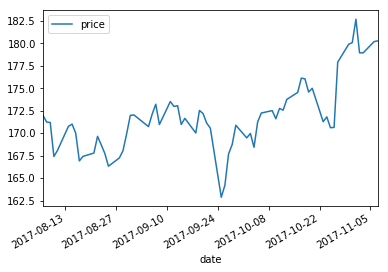

In [12]:
stockDF.plot(x='date', y='price')

### Plotting lagged price by price

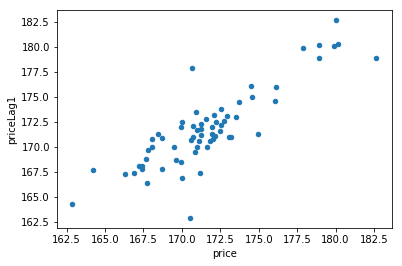

In [13]:
stockDF.plot.scatter(x='price', y='priceLag1')

### Plotting Change
Notice it at least visually appears to be randomly scattered around 0

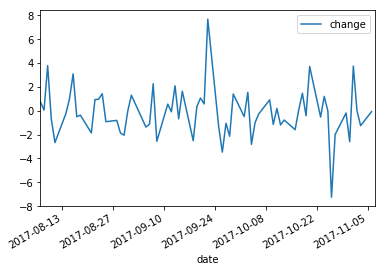

In [14]:
stockDF.plot(x='date', y='change')

### Mean, standard deviation, autocorrelation of change in prices
We have a mean close to zero, and a fairly wide standard deviation.

In [15]:
stockDF['change'].mean()

-0.1272307692307694

In [16]:
stockDF['change'].std()

2.078147092132427

In [17]:
stockDF['change'].autocorr(lag=1)

-0.035472554593694069

Note above that autocorrelation is close to zero. This is what tells us that past changes do not affect current changes

# Why does this matter?

To forecast the price of stock the next day, **your best statistical guess is the price of that same stock today, plus the mean change in past prices.** This means that it's easy to predict the price of a stock, but hard to predict their change. Using data on past stock prices does not lend hints as to future price changes that may bring profits to investors